<a href="https://colab.research.google.com/github/Daisuke0209/preprocessing/blob/master/190511_filters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FIlters

## Mount Google Drive

In [1]:
#Google Driveのマウントを取る
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


## Import Libraries

In [0]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import *

## Import Pic

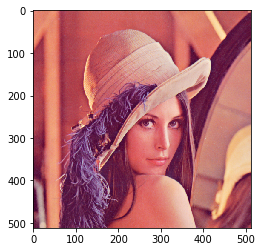

In [3]:
image = Image.open('/content/gdrive/My Drive/Datasets/color/lena.png')
im = np.asarray(image)
l=512
plt.imshow(im)
pil_img = Image.fromarray(im)
pil_img.convert("RGB").save("lena.jpg","JPEG")

## Make the image monochrome

(512, 512)


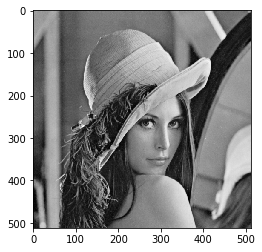

In [145]:
im_gray = 0.299 * im[:, :, 0] + 0.587 * im[:, :, 1] + 0.114 * im[:, :, 2]
plt.gray()
plt.imshow(im_gray)
pil_img = Image.fromarray(im_gray)
pil_img.convert("RGB").save("lena_gray.jpg","JPEG")
print(im_gray.shape)

## Correlation Function

In [0]:
def correlation(img,F):
  N,M=img.shape
  re_image=np.zeros(N*M).reshape(N,M)
  L=len(F)
  F=F.reshape(L**2,)
  #padding
  img=np.pad(img,int((L-1)/2),'constant')
  for i in range(N):
    for j in range(M):
      a=img[i:i+L,j:j+L].reshape(L**2,)
      
      re_image[i,j]=np.dot(a,F)
      
  return re_image

## Convolution Function

In [0]:
def convolution(img,F):
  N,M=img.shape
  re_image=np.zeros(N*M).reshape(N,M)
  L=len(F)
  F=F.reshape(L**2,)
  #padding
  img=np.pad(img,int((L-1)/2),'constant')
  for i in range(N):
    for j in range(M):
      a=img[i:i+L,j:j+L].reshape(L**2,)
      
      re_image[i,j]=np.dot(a,F.T)
      
  return re_image

##Averaging Filter

In [0]:
L=15
F=np.array([1/L**2 for i in range(L**2)]).reshape(L,L)
img=convolution(im_gray,F)

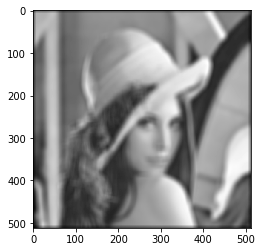

In [171]:
plt.gray()
plt.imshow(img)
pil_img = Image.fromarray(img)

## Gaussian Filter

In [0]:
def norm2d(x,y,sigma):
    Z = np.exp(-(x**2 + y**2) / (2 * sigma**2)) / (2 * np.pi * sigma**2)
    return Z
def gaussian_kernel(size):
  sigma=(size-1)/2
  
  x=y=np.arange(0,size)-sigma
  X,Y=np.meshgrid(x,y)
  
  mat=norm2d(X,Y,sigma)
  
  kernel=mat/np.sum(mat)
  
  return kernel

In [0]:
F=gaussian_kernel(19)
img=convolution(im_gray,F)

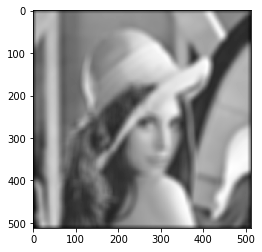

In [175]:
plt.gray()
plt.imshow(img)
pil_img = Image.fromarray(img)